In [37]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

#from matplotlib import animation
#mpl.rcParams['figure.figsize'] = (10.0, 10.0)
plt.style.use('seaborn')
#%matplotlib inline 

### Analyze Population of districts in India

In [49]:
populationdf = pd.read_csv("./data-files/census-population.csv")
populationdf.drop(['Subdistt', 'Town/Village', 'Ward', 'EB'], axis=1, inplace=True)
print(populationdf.shape)
populationdf.head(3)

(2028, 24)


,State,District,Level,Name,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_06,...,F_SC,P_ST,M_ST,F_ST,P_LIT,M_LIT,F_LIT,P_ILL,M_ILL,F_ILL
0,0,0,India,India,Total,249501663,1210854977,623270258,587584719,164515253,...,97843058,104545716,52547215,51998501,763638812,434763622,328875190,447216165,188506636,258709529
1,0,0,India,India,Rural,168612897,833748852,427781058,405967794,121322865,...,74732561,94083844,47263733,46820111,482793835,281361374,201432461,350955017,146419684,204535333
2,0,0,India,India,Urban,80888766,377106125,195489200,181616925,43192388,...,23110497,10461872,5283482,5178390,280844977,153402248,127442729,96261148,42086952,54174196


In [14]:
populationdf.head(10)

,State,District,Level,Name,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_06,...,F_SC,P_ST,M_ST,F_ST,P_LIT,M_LIT,F_LIT,P_ILL,M_ILL,F_ILL
0,0,0,India,India,Total,249501663,1210854977,623270258,587584719,164515253,...,97843058,104545716,52547215,51998501,763638812,434763622,328875190,447216165,188506636,258709529
1,0,0,India,India,Rural,168612897,833748852,427781058,405967794,121322865,...,74732561,94083844,47263733,46820111,482793835,281361374,201432461,350955017,146419684,204535333
2,0,0,India,India,Urban,80888766,377106125,195489200,181616925,43192388,...,23110497,10461872,5283482,5178390,280844977,153402248,127442729,96261148,42086952,54174196
3,1,0,STATE,JAMMU & KASHMIR,Total,2119718,12541302,6640662,5900640,2018905,...,438759,1493299,776257,717042,7067233,4264671,2802562,5474069,2375991,3098078
4,1,0,STATE,JAMMU & KASHMIR,Rural,1553433,9108060,4774477,4333583,1593008,...,358045,1406833,730075,676758,4747950,2891749,1856201,4360110,1882728,2477382
5,1,0,STATE,JAMMU & KASHMIR,Urban,566285,3433242,1866185,1567057,425897,...,80714,86466,46182,40284,2319283,1372922,946361,1113959,493263,620696
6,1,1,DISTRICT,Kupwara,Total,113929,870354,474190,396164,188798,...,2,70352,36913,33439,439654,282823,156831,430700,191367,239333
7,1,1,DISTRICT,Kupwara,Rural,101930,765625,412038,353587,169588,...,2,68491,35855,32636,374998,238785,136213,390627,173253,217374
8,1,1,DISTRICT,Kupwara,Urban,11999,104729,62152,42577,19210,...,0,1861,1058,803,64656,44038,20618,40073,18114,21959
9,1,2,DISTRICT,Badgam,Total,103363,753745,398041,355704,155202,...,25,23912,12383,11529,335649,207741,127908,418096,190300,227796


No handles with labels found to put in legend.


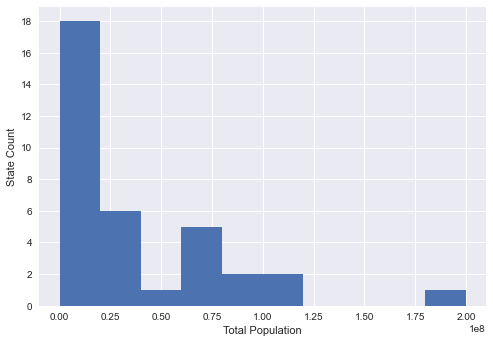

In [47]:
mask1 = populationdf['Level']=='STATE'
mask2 = populationdf['TRU']=='Total'
df = populationdf[mask1 & mask2]

plt.hist(df['TOT_P'])

plt.xlabel('Total Population')
plt.ylabel('State Count')
plt.yticks(np.arange(0,20,2))

plt.grid(True)
plt.legend()